In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('./0404/dataset.csv')
df.dropna(inplace=True)
df

,date,Usage_power_total,product_1,product_2,product_total,temp,humid
0,2017-01-01,"6,095.70",0.0,0.00,0.00,1.1,73.000000
1,2017-01-02,"9,962.15",19399.4,1411.00,20810.40,2.5,67.000000
2,2017-01-03,"11,196.00",20456.6,1802.00,22258.60,4.1,56.000000
3,2017-01-04,"12,146.23",20003.6,2092.00,22095.60,4.3,67.583333
4,2017-01-05,"12,156.81",20256.1,2026.00,22282.10,2.3,71.541667
...,...,...,...,...,...,...,...
1643,2021-07-30,"16,418.70",0.0,0.00,0.00,26.7,80.958333
1644,2021-07-31,"8,942.10",0.0,0.00,0.00,26.8,79.583333
1645,2021-08-01,"6,092.81",0.0,0.00,0.00,25.8,90.500000
1646,2021-08-02,"13,881.39",16043.4,3973.20,20016.60,25.5,89.333333


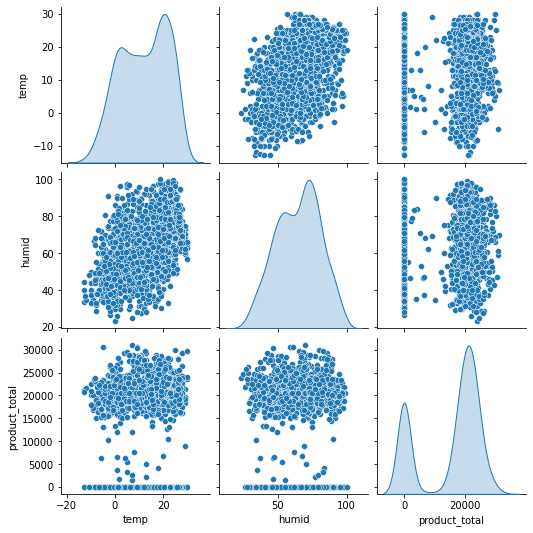

In [7]:
sns.pairplot(df[ ['temp', 'humid', 'product_total', 'Usage_power_total'] ], diag_kind="kde")

In [4]:
# X: feature, y: label

X = df[ ['temp', 'humid', 'product_1', 'product_2', 'product_total'] ]
# y = df[ ['Usage_power_1', 'Usage_power_2', 'Usage_power_total', 'Usage_LNG_1', 'Usage_LNG_2', 'Usage_LNG_total'] ]
y = df[ ['Usage_power_total'] ]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear Regression #

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test, squared = False)

36070.025086289126

# SVM

In [9]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

/home/liv/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVR(epsilon=1.5)

In [10]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/liv/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: x and y must be the same size

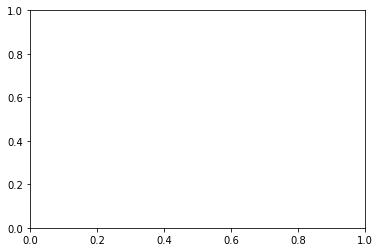

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker="+")
plt.scatter(X_test, y_pred, marker="o")
plt.show()